In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
# import NLTK
from langdetect import detect
import string

In [75]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#https://realpython.com/sentiment-analysis-python/

# 1: Load Raw Data

In [385]:
training_df = pd.read_csv('train.csv', header=None, names=['Rating', 'Title', 'Review'])
testing_df = pd.read_csv('test.csv', header=None, names=['Rating', 'Title', 'Review'])

# 1.5: Remove Non-English Reviews

In [387]:
print("Language: ", detect('Hello, simple english review because I like reviewing products in english!'))
print("Language: ", detect('Avez-vous déjà vu un CD double et un DVD avec'))

Language:  en
Language:  fr


In [68]:
training_df['Language'] = detect(str(training_df['Review']))
testing_df['Language'] = detect(str(testing_df['Review']))

In [388]:
# training_df.head()

In [389]:
# testing_df.head()

In [71]:
non_english_mask = (training_df['Language'] == 'en')
training_df = training_df[non_english_mask]

non_english_mast = (testing_df['Language'] == 'en')
testing_df = testing_df[non_english_mask]

In [62]:
training_df['Language'].unique()

array(['en'], dtype=object)

In [73]:
testing_df['Language'].unique()

array(['en'], dtype=object)

In [65]:
len(training_df)

3000000

In [74]:
len(testing_df)

650000

Evaluate Rating Distribution

In [78]:
print(training_df['Rating'].unique())

[3 5 4 1 2]


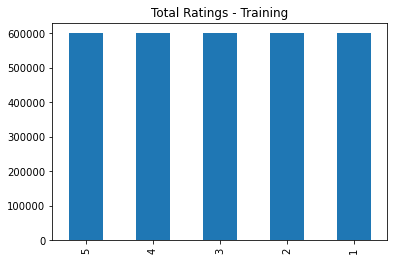

In [383]:
plt.title('Total Ratings - Training')
training_df['Rating'].value_counts().plot.bar()
plt.savefig('Ratings Distribution.png')
plt.show()

In [92]:
# testing_df['Rating'].value_counts().plot.bar()
# plt.show()

Evaluate Length of Reviews

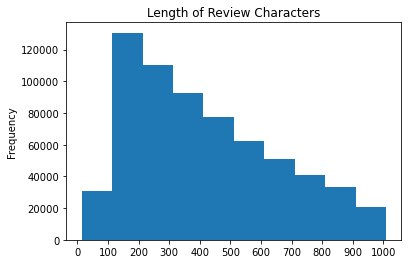

In [381]:
plt.title("Length of Review Characters")
testing_df['Review'].str.len().plot.hist(bins = 10)
plt.xticks(np.linspace(0, 1000, 11))
plt.savefig('Review Length Hist.png')
plt.show()

# 2: Tokenization (sentence vs word tokenization)
- Tokenize each element in 'review' column
- Filter out symbols
- Filter out stop words

In [380]:
def remove_punc(text):
    result_text = text.translate(str.maketrans('', '', string.punctuation))
    return result_text

s = r'This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment! '
remove_punc(s)

'This model may be ok for sedentary types but Im active and get around alot in my job  consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking 2030 stock 114622 Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [376]:
def remove_nums(text):
    result_text = ''.join([i for i in text if not i.isdigit()])
    return result_text

remove_nums(remove_punc(s))

'This model may be ok for sedentary types but Im active and get around alot in my job  consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking  stock  Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [377]:
import re
def remove_spaces(text):
    result_text = re.sub(' +', ' ', text)
    return result_text

remove_spaces(remove_nums(remove_punc(s)))

'This model may be ok for sedentary types but Im active and get around alot in my job consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking stock Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [378]:
remove_spaces(remove_nums(remove_punc(s))).lower()

'this model may be ok for sedentary types but im active and get around alot in my job consistently found these stockings rolled up down by my ankles not good solution go with the standard compression stocking stock excellent support stays up and gives me what i need both pair of these also tore as i struggled to pull them up all the time good riddancebad investment '

In [379]:
def remove_stop_words(text):
    
    nlp = spacy.load('en_core_web_sm')
    text_list = nlp(text)
    
#     stop_list = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 'no', 'not',
#                  'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 
#                  'will', 'with']
    
    temp_list = []
    for token in text_list:
        if not token.is_stop:
            temp_list.append(token)
    
    str_output = ' '.join([str(elem) for elem in temp_list])
    return str_output
#     return temp_list
    
    
remove_stop_words(remove_spaces(remove_nums(remove_punc(s))).lower())

'model ok sedentary types m active alot job consistently found stockings rolled ankles good solution standard compression stocking stock excellent support stays gives need pair tore struggled pull time good riddancebad investment'

### Def preprocess
    # output list = []
    # for element in row
        # text = row's text
        # output text = remove_punctuation(text)
        # output text = remove_numbers(output text)
        # output text = lowercase(output text)
        # output text = remove_stop words(output text)
        # output list.append(output text )
    # return output list 

In [191]:
def process_column(unprocessed_list):
    output_list = []
    count = 0
    for item in unprocessed_list:
        if item != ' ':            
            output_list.append( remove_nums(remove_punc(remove_stop_words(item))).lower()  )
        else:
            output_list.append(' ')
        
        count += 1
        
        if count % 100 == 0:
            print(count)
        
    return output_list


In [192]:
import datetime
start_time = datetime.datetime.now()


test_raw_reviews = testing_df['Review'].tolist()
test_processed_reviews = process_column(test_raw_reviews[:2500])




end_time = datetime.datetime.now()
print(end_time - start_time)


# test_processed_reviews

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [390]:
print('---------- Review 1 ----------')
print('Raw: ', test_raw_reviews[0], '\n\n')
print('Processed: ', test_processed_reviews[0])
print('\n')
print('---------- Review 2 ----------')
print('Raw: ', test_raw_reviews[2], '\n\n')
print('Processed: ', test_processed_reviews[2])

---------- Review 1 ----------
Raw:  This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment! 


Processed:  model ok sedentary types  active alot job  consistently found stockings rolled ankles  good   solution  standard compression stocking      stock    excellent support  stays gives need  pair tore struggled pull time  good riddance  bad investment 


---------- Review 2 ----------
Raw:  I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a ba

In [391]:
# t0 = training_df['Review'].loc[0]
# t1 = training_df['Review'].loc[1]
# t2 = training_df['Review'].loc[2]
# t3 = training_df['Review'].loc[3]
# t4 = training_df['Review'].loc[4]


# nlp = spacy.load('en_core_web_sm')
# doc = nlp(t0)

# token_list = []
# for token in doc:
#     #remove stop words
#     token_list.append(token)

# token_list

In [392]:
# filtered_token_list = []
# for token in token_list:
#     if not token.is_stop:
#         filtered_token_list.append(token)
        
# filtered_token_list

# 3: Normalization
- Stemming vs Lemmatization
- Normalize each element in 'reviews' 

In [394]:
#TBD - Current version is unnormalized 

# 4: Vectorization
- Vectorize each token of 'reviews' 
- Save vectorized reviews data

In [195]:
sample_df = pd.DataFrame()
sample_df['Targets'] = testing_df['Rating'].tolist()[:2500]
sample_df['Processed Text'] = test_processed_reviews
print("only first 2,500 samples of validation data")
sample_df.head()

only first 2,500 samples of validation data


,Targets,Processed Text
0,1,model ok sedentary types active alot job con...
1,4,fast read filled unexpected humour profound in...
2,2,bought chargers instructions lights stay batt...
3,2,excited find book ostensibly muslim feminism ...
4,2,big jvc fan like model suspiscious saw units...


In [199]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(sample_df['Processed Text'].values)

X = tokenizer.texts_to_sequences(sample_df['Processed Text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length

y = sample_df['Targets'].tolist()

In [226]:
y = pd.get_dummies(sample_df['Targets']).values
# [print(sample_df['Targets'][i], y[i]) for i in range(0,15)]
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

# 5: Classification
- Create classifier for vectorized data
- TensorFlow (Google, more DIY, more customizable/complex, bit more powerful with steeper learning curve)
- PyTorch (Facebook's version of TF, comperable to tf, apparently it's slightly easier to pick up)
- Scikit Learn (Extremely simple in comparison to tf and pytorch) 
- spaCy also has a text classifier if we want to use that 
- 
    #### 5.1
    - Split into training/test sets
    - Likely 80/20
- 
    #### 5.2
    - Model selection
- 
    #### 5.3
    - Train model
- 
    #### 5.4
    - Evaluate performance
- 
    #### 5.5
    - Tweak parameters
    - Potentially include hyperparameters
- 
    #### 5.6
    - Generate predictions
    - Vector from (-1.0, 1.0)

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [228]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout

model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 77, 256)           1280000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 77, 256)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 77, 256)           525312    
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 2,331,909
Trainable params: 2,331,909
Non-trainable params: 0
_________________________________________________________________


In [231]:
# y_train.shape
# X_train.shape

(2000, 5)

In [232]:
batch_size = 125
epochs = 5

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/3
20/20 - 77s - loss: 1.6072 - accuracy: 0.2185
Epoch 2/3
20/20 - 74s - loss: 1.5129 - accuracy: 0.3670
Epoch 3/3
20/20 - 75s - loss: 1.1930 - accuracy: 0.5060


In [397]:
predictions = model.predict(X_test)

[print('Text: ', sample_df['Processed Text'][i], '\nPredicted Output: ', predictions[i], '\nTrue Classification: ', y_test[i], '\n\n') for i in range(0, 10)]

Text:  model ok sedentary types  active alot job  consistently found stockings rolled ankles  good   solution  standard compression stocking      stock    excellent support  stays gives need  pair tore struggled pull time  good riddance  bad investment  
Predicted Output:  [0.03223629 0.06839251 0.2425516  0.38293523 0.2738844 ] 
True Classification:  [0 0 1 0 0] 


Text:  fast read filled unexpected humour profound insights art politics policy  brief  sly  wry  wise  
Predicted Output:  [0.02207217 0.03374951 0.10841644 0.34386837 0.4918935 ] 
True Classification:  [0 0 0 1 0] 


Text:  bought chargers  instructions lights stay battery charges  true  instructions dont lights turn  true   hours charging lights stay  returned thinking bad unit  new thing  kept charge  lights useless stay   backup  charger manage drain aas want charger  
Predicted Output:  [0.03862078 0.07708392 0.20740391 0.37580746 0.30108395] 
True Classification:  [0 0 0 0 1] 


Text:  excited find book ostensibly mu

[None, None, None, None, None, None, None, None, None, None]

In [234]:
predictions

array([[0.03223629, 0.06839251, 0.2425516 , 0.38293523, 0.2738844 ],
       [0.02207217, 0.03374951, 0.10841644, 0.34386837, 0.4918935 ],
       [0.03862078, 0.07708392, 0.20740391, 0.37580746, 0.30108395],
       ...,
       [0.02664071, 0.03809747, 0.1200909 , 0.34041306, 0.47475782],
       [0.06507093, 0.09555285, 0.2698277 , 0.3198997 , 0.24964885],
       [0.19878137, 0.2134793 , 0.16600882, 0.1972839 , 0.2244466 ]],
      dtype=float32)

# Evaluate with sample review

In [353]:
# dummy_review = 'This is the best water bottle I have ever used. I love that it is BPA free and great on the environment. I think that everyone who is looking for a good water bottle should buy this one, it is absolutley perfect and totally what I am looking for. I love it!'
dummy_review = 'I absolutley love this product, it is everything that I expected. The quality is unbeatable for the price. This product is amazing. I could not reccomend this product more!'
dummy_review

'I absolutley love this product, it is everything that I expected. The quality is unbeatable for the price. This product is amazing. I could not reccomend this product more!'

In [354]:
dummy_processed = [remove_nums(remove_punc(remove_stop_words(dummy_review))).lower()]
dummy_processed

['absolutley love product  expected  quality unbeatable price  product amazing  reccomend product ']

In [355]:
#Reshape to correct input size 

dummy_vectorized = tokenizer.texts_to_sequences(dummy_processed)
dummy_vectorized = np.concatenate( ( np.zeros((1, (len(X[0]) - len(dummy_vectorized[0]))))[0]  , (dummy_vectorized[0]) )  )
dummy_vectorized = np.asarray(dummy_vectorized)
dummy_vectorized = np.expand_dims(dummy_vectorized, axis = 0)
dummy_vectorized.shape

(1, 77)

In [356]:
model.predict(dummy_vectorized)

array([[0.06943715, 0.05383236, 0.11278591, 0.26849952, 0.49544504]],
      dtype=float32)